In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv('data/digit-recognizer/train.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data.shape

(42000, 785)

In [4]:
data.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
25138,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


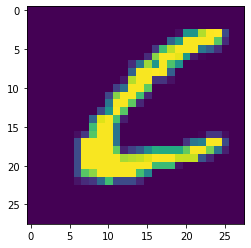

In [5]:
plt.imshow(data.iloc[31842,1:].values.reshape(28,28))

In [6]:
np.count_nonzero(data.isna().sum()) #no missing values

0

In [7]:
X = data.iloc[:,1:]
y = data.iloc[:,0]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [9]:
knn = KNeighborsClassifier(n_jobs=-1)
rf = RandomForestClassifier(n_jobs=-1)

In [10]:
knn.fit(X_train,y_train)
rf.fit(X_train,y_train)

RandomForestClassifier(n_jobs=-1)

In [11]:
start1 = time.time()
y_knn = knn.predict(X_test)
print("knn time ::: ",time.time()-start1)

knn time :::  35.85518717765808


In [12]:
start2 = time.time()
y_rf = rf.predict(X_test)
print("rf time ::: ",time.time()-start2)

rf time :::  0.19778776168823242


In [13]:
print("accuracy score of knn ::  ",accuracy_score(y_test,y_knn))
print("accuracy score of rf ::  ",accuracy_score(y_test,y_rf))

accuracy score of knn ::   0.9651190476190477
accuracy score of rf ::   0.9629761904761904


In [14]:
#Scaling the data for pca
scale = StandardScaler()

In [15]:
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [16]:
pca = PCA(n_components=250)

In [17]:
X_train2 = pca.fit_transform(X_train)
X_test2 = pca.transform(X_test)

In [18]:
knn.fit(X_train2,y_train)

KNeighborsClassifier(n_jobs=-1)

In [19]:
y_knnp = knn.predict(X_test2)
print("accuracy score of knn after pca ::  ",accuracy_score(y_test,y_knnp))

accuracy score of knn after pca ::   0.944047619047619


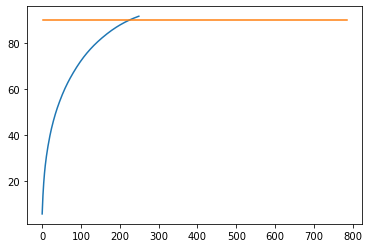

In [20]:
var_score = pca.explained_variance_
var_per = pca.explained_variance_ratio_*100
var_per_list = np.cumsum(var_per)

for i in range(0,var_per_list.shape[0]):
                                 
    if var_per_list[i]>90:
        index = i
        break

per=[]
for i in range(1,785):
    per.append(var_per_list[index])

plt.plot(var_per_list)
plt.plot(range(1,785),per)

In [21]:
index

224

In [26]:
X_train3 = scale.fit_transform(X_train)
X_test3 = scale.transform(X_test)
X2 = scale.fit_transform(X)
pca = PCA(n_components=224)

X_train3 = pca.fit_transform(X_train3)
X_test3 = pca.transform(X_test3)
X2 = pca.fit_transform(X2)

knn.fit(X_train3,y_train)

y_knnp = knn.predict(X_test3)
print("accuracy score of knn after pca ::  ",accuracy_score(y_test,y_knnp))

accuracy score of knn after pca ::   0.9441666666666667


In [27]:
print(classification_report(y_test,y_knnp))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       821
           1       0.96      0.99      0.98       962
           2       0.95      0.94      0.94       829
           3       0.93      0.94      0.93       864
           4       0.97      0.93      0.95       856
           5       0.92      0.93      0.92       729
           6       0.96      0.96      0.96       839
           7       0.94      0.94      0.94       873
           8       0.97      0.90      0.93       793
           9       0.90      0.92      0.91       834

    accuracy                           0.94      8400
   macro avg       0.94      0.94      0.94      8400
weighted avg       0.94      0.94      0.94      8400



In [ ]:
cv_knn = cross_val_score(knn,X2,y,cv=10,n_jobs=-1)

In [ ]:
cv_knn